# Obtendo Currículos.

## Changelog

versionadded
: 24.07

    - 👨‍🎓 INEP - area tag proportions ipnb (18)

versionchanged
: 24.07

    - 👨‍🎓 :teacher: INEP - Added documentation ipnb (20)

>   **Open Source Notification:** This file is part of open source program **INEP**
>   > **Copyright © 2023  Carlo Oliveira** [carlo @ nce](mailto:carlo@nce.ufrj.br),
> 
>   **SPDX-License-Identifier:** [GNU General Public License v3.0 or later] (https://is.gd/3Udt).
>   > Labase (http://labase.selfip.org/) - NCE (https://portal.nce.ufrj.br) - UFRJ (https://ufrj.br/).

codeauthor:
: [Carlo Oliveira](mailto:carlo@nce.ufrj.br)

## Lendo do arquivo de horas

In [137]:
import os
from collections import Counter
from pathlib import Path
from csv import DictReader
import pandas as pd
here = os.path.abspath('')
dados = Path(here).parent.parent / "src" / "data" / 'horas.csv'
with open(dados, 'r', encoding='utf-8') as fd:
    fn = "curso_id,nome_disciplina,rotulo,horas,nomeado".split(",")
    tt = [dict(curso_id= r["curso_id"], horas=r["horas"]) for r in (DictReader(fd, fieldnames=fn)) if r and r["nome_disciplina"] == "__TOTAL__"]
    d_total = pd.DataFrame(tt)
with open(dados, 'r', encoding='utf-8') as fd:
    fn = "curso_id,nome_disciplina,rotulo,horas,nomeado".split(",")
    t = [r for r in (DictReader(fd, fieldnames=fn)) if r and r["nome_disciplina"] != "__TOTAL__"][1:]
    df = pd.DataFrame(t)
    df['rotulo'] = df['rotulo'].str[:7]  # , n=1, expand=True)
    df['horas'] = df['horas'].astype(int)
    df['nomeado'] = df['nomeado'].str.lower()
d_total

,curso_id,horas
0,1666036,3204
1,1671887,2000
2,1598939,2000
3,1565359,2067
4,1550008,2100
5,1537675,1700
6,153693,1700
7,1625436,1600
8,1617717,2178
9,1615338,2178


# Estatísticas das Disciplinas
- Contagem das horas
- Contagem das palavras

## Cálculo inicial das horas (inclui total)
Total de horas por rótulo

In [138]:
dg = df.groupby(['rotulo', 'nomeado'])['horas'].sum()
dg

rotulo   nomeado                           
0612D01  defesa cibernética                    16964
0612G01  gestão da tecnologia da informação     3880
0613E01  engenharia de software                 6734
0615S01  segurança da informação                6312
0615S02  sistemas de informação                 6065
0615S03  sistemas para internet                 7580
0616I01  internet das coisas                    1620
Name: horas, dtype: int64

## Total de horas por curso

In [139]:
dc = df.groupby(['curso_id', 'nomeado'])['horas'].sum()
dt = df.groupby(['curso_id', 'nome_disciplina'])['horas']
dc

curso_id  nomeado                           
1517110   sistemas de informação                2185
153693    gestão da tecnologia da informação    1840
1537675   sistemas para internet                1900
1549921   segurança da informação               3960
1550008   defesa cibernética                    2240
1565359   engenharia de software                1890
1588016   sistemas de informação                2100
1594810   sistemas de informação                1780
1598939   engenharia de software                1940
1599632   engenharia de software                2904
1615338   sistemas para internet                2000
1617717   defesa cibernética                    2000
1617840   defesa cibernética                    1820
1617841   sistemas para internet                1820
1618022   segurança da informação               2352
1619434   internet das coisas                   1620
1620488   defesa cibernética                    1888
1620561   sistemas para internet                1860
1

## Calcula e tokeniza as palavras das disciplinas

In [140]:
dn = df["nome_disciplina"]
from util import vetorize, euclid, tokenize_into_words as tokenize
from itertools import chain as ch
dn = ch.from_iterable(tokenize(words) for words in dn)
ln = list(dn)
cn = Counter(ln)
cr = cn.most_common(150)
(len(ln), len(set(ln)), cr)

(2229,
 473,
 [('segurança', 78),
  ('sistemas', 64),
  ('programação', 60),
  ('desenvolvimento', 56),
  ('projeto', 53),
  ('cibersegurança', 53),
  ('dados', 50),
  ('redes', 35),
  ('computadores', 31),
  ('gestão', 29),
  ('informação', 28),
  ('software', 27),
  ('arquitetura', 26),
  ('banco', 26),
  ('móveis', 25),
  ('mobile', 25),
  ('extensão', 23),
  ('operacionais', 21),
  ('atividades', 21),
  ('aplicações', 20),
  ('computação', 18),
  ('engenharia', 18),
  ('nuvem', 18),
  ('digital', 18),
  ('imersão', 18),
  ('profissional', 18),
  ('objetos', 17),
  ('análise', 17),
  ('orientada', 16),
  ('fundamentos', 15),
  ('criptografia', 14),
  ('brasileira', 14),
  ('design', 13),
  ('libras', 13),
  ('lógica', 12),
  ('web', 12),
  ('dispositivos', 12),
  ('modelagem', 12),
  ('privacidade', 12),
  ('projetos', 12),
  ('introdução', 12),
  ('sociedade', 11),
  ('língua', 11),
  ('tecnologias', 10),
  ('tópicos', 10),
  ('algoritmos', 10),
  ('hacking', 10),
  ('sinais', 10),

## Vetoriza os nomes das disciplinas

In [141]:
df["tokens"] = df["nome_disciplina"].apply(tokenize)
df["vector"] = df["tokens"].apply(vetorize)
df["rotulo"] = df["rotulo"].astype(str)
d_tot = df.groupby(['curso_id'])['horas'].sum()

df["ch"] = df.apply(lambda row: (row.horas*100)/d_tot[row.curso_id], axis=1)

import csv
sai = Path(here).parent.parent / "src" / "data" / 'relatorio1.csv'
df.to_csv(sai, encoding='utf-8', index=False, quoting=csv.QUOTE_NONNUMERIC, quotechar='"')
df

/home/carlo/Documentos/dev/spike/src/ipnb/util.py:44: RuntimeWarning: Mean of empty slice.
  return np.array([GLOVER[w] for w in _words]).mean(axis=0)


,curso_id,nome_disciplina,rotulo,horas,nomeado,tokens,vector,ch
0,1666036,Projeto Integrador - Elementos e Conceitos de ...,0612D01,70,defesa cibernética,"[projeto, integrador, elementos, conceitos, ci...","[-0.05084260000000003, 0.20778920000000003, 0....",2.138057
1,1666036,Sistemas Computacionais para CiberSegurança,0612D01,63,defesa cibernética,"[sistemas, computacionais, cibersegurança]","[0.098875, 0.17971766666666666, 0.112613666666...",1.924252
2,1666036,Estudo do Espaço Cibernético,0612D01,63,defesa cibernética,"[estudo, espaço, cibernético]","[0.18051766666666666, -0.181362, 0.05125366666...",1.924252
3,1666036,Lógica Matemática,0612D01,63,defesa cibernética,"[lógica, matemática]","[0.064137, 0.145569, -0.057595499999999994, 0....",1.924252
4,1666036,Teologia e Fenômeno Humano,0612D01,32,defesa cibernética,"[teologia, fenômeno, humano]","[0.10753833333333333, -0.08160933333333333, 0....",0.977398
...,...,...,...,...,...,...,...,...
724,1549921,Usabilidade e Fatores Humanos em Cibersegurança,0615S01,80,segurança da informação,"[usabilidade, fatores, humanos, cibersegurança]","[0.210529, 0.24265525, -0.049493749999999996, ...",2.020202
725,1549921,Governança de Cibersegurança,0615S01,80,segurança da informação,"[governança, cibersegurança]","[0.152522, 0.19354749999999998, -0.1372115, 0....",2.020202
726,1549921,Blockchain,0615S01,80,segurança da informação,[blockchain],"[0.075335, -0.003288, 0.017649, 0.173275, 0.03...",2.020202
727,1549921,Empreendedorismo e Inovação em TI,0615S01,40,segurança da informação,"[empreendedorismo, inovação, ti]","[0.232263, -0.22350466666666668, -0.0052239999...",1.010101


## Atribui um vetor médio para cada disciplina

In [142]:
dv = df.groupby(['rotulo'])['vector'].mean()
dfv = pd.DataFrame(dv, index=df['rotulo'])
dv

rotulo
0612D01    [0.08212626658258101, 0.14919778840945308, 0.0...
0612G01    [0.11604870310734465, 0.09433873644067801, 0.0...
0613E01    [0.0712639909733124, 0.05999575782312926, 0.07...
0615S01    [0.08014285920542637, 0.15576943071705426, 0.0...
0615S02    [0.10645183789198606, 0.1499687845818815, 0.05...
0615S03    [0.11720448863826236, 0.09879519181286549, 0.0...
0616I01    [0.15059945432098765, 0.1414789487654321, -0.0...
Name: vector, dtype: object

## Calcula a distância euclidiana de cada disciplina

In [143]:
df["euclidiana"] = df.apply(lambda row: euclid(row.vector, dv[row.rotulo]), axis=1)
de = df.groupby(['rotulo'])['euclidiana'].mean().reset_index(name='media')
# de = pd.DataFrame(de, index=df['rotulo'])
# de.reset_index(inplace=True)
ds = df.groupby(['rotulo'])['euclidiana'].std().reset_index(name='desvio')
# ds = pd.DataFrame(ds, index=df['rotulo'])
# ds.reset_index(inplace=True)
de["std"] = ds["desvio"]
de["menor"] = de["media"].sub(de["std"])
de.set_index(['rotulo'], inplace=True)
# de["rotulo"] = de["rotulo"].astype(str)
# de = de.groupby(['rotulo', "menor"]).size() #.reset_index(name='menor')
# de = pd.DataFrame(de, index=['rotulo'])
# de.reset_index(inplace=True)
de = de["menor".split(",")].copy()
de.reset_index(inplace=True)
de[de['rotulo'] == '0612D01'].menor.values[0]

0.6788681605760385

In [144]:
dc = df["curso_id,nome_disciplina,rotulo,horas,nomeado,euclidiana,vector".split(",")].copy()
ds = dc.groupby(['curso_id'])["euclidiana"].std()
dm = dc.groupby(['curso_id'])["euclidiana"].mean()
dc["normal"] = dc.apply(lambda row: abs(row.euclidiana-dm[row.curso_id])/ ds[row.curso_id], axis=1)
dc

,curso_id,nome_disciplina,rotulo,horas,nomeado,euclidiana,vector,normal
0,1666036,Projeto Integrador - Elementos e Conceitos de ...,0612D01,70,defesa cibernética,0.712034,"[-0.05084260000000003, 0.20778920000000003, 0....",0.795330
1,1666036,Sistemas Computacionais para CiberSegurança,0612D01,63,defesa cibernética,0.716514,"[0.098875, 0.17971766666666666, 0.112613666666...",0.771227
2,1666036,Estudo do Espaço Cibernético,0612D01,63,defesa cibernética,1.064407,"[0.18051766666666666, -0.181362, 0.05125366666...",1.100538
3,1666036,Lógica Matemática,0612D01,63,defesa cibernética,1.104604,"[0.064137, 0.145569, -0.057595499999999994, 0....",1.316808
4,1666036,Teologia e Fenômeno Humano,0612D01,32,defesa cibernética,1.186576,"[0.10753833333333333, -0.08160933333333333, 0....",1.757839
...,...,...,...,...,...,...,...,...
724,1549921,Usabilidade e Fatores Humanos em Cibersegurança,0615S01,80,segurança da informação,0.798916,"[0.210529, 0.24265525, -0.049493749999999996, ...",0.723035
725,1549921,Governança de Cibersegurança,0615S01,80,segurança da informação,0.926740,"[0.152522, 0.19354749999999998, -0.1372115, 0....",0.291102
726,1549921,Blockchain,0615S01,80,segurança da informação,0.810069,"[0.075335, -0.003288, 0.017649, 0.173275, 0.03...",0.685345
727,1549921,Empreendedorismo e Inovação em TI,0615S01,40,segurança da informação,0.978004,"[0.232263, -0.22350466666666668, -0.0052239999...",0.117877


## Gera todas as distâncias por disciplina

In [145]:
for rotulo, vetor in dfv.itertuples(name=None):
    dc[rotulo] = df.apply(lambda row: euclid(row.vector, vetor), axis=1)
import csv

dc["dentro"] = dc.apply(lambda row: 1  if max(0, row.euclidiana - de[de['rotulo'] == row.rotulo].menor.values[0]*1.2)>0 else 0, axis=1)
dp = dc[["curso_id", "dentro",'nome_disciplina', "horas","rotulo","nomeado"]].copy()
sair = Path(here).parent.parent / "src" / "data" / 'relatorio0.csv'
dp.to_csv(sair, encoding='utf-8', index=False, quoting=csv.QUOTE_NONNUMERIC, quotechar='"')


### Determina o Rótulo mais provável por disciplina

In [146]:
cols = ['0612D01', '0613E01', '0615S03', '0612G01', '0615S02', '0615S01', '0616I01']
def rotulo(rotular):
    return cols[rotular.index(min(rotular))]
print("cols", cols)
dc["tag"] = dc.apply(lambda row: rotulo([row.get(c) for c in cols]), axis=1)
dc

cols ['0612D01', '0613E01', '0615S03', '0612G01', '0615S02', '0615S01', '0616I01']


,curso_id,nome_disciplina,rotulo,horas,nomeado,euclidiana,vector,normal,0612D01,0613E01,0615S03,0612G01,0615S02,0615S01,0616I01,dentro,tag
0,1666036,Projeto Integrador - Elementos e Conceitos de ...,0612D01,70,defesa cibernética,0.712034,"[-0.05084260000000003, 0.20778920000000003, 0....",0.795330,0.712034,0.721505,0.708964,0.732386,0.733918,0.755371,0.779806,0,0615S03
1,1666036,Sistemas Computacionais para CiberSegurança,0612D01,63,defesa cibernética,0.716514,"[0.098875, 0.17971766666666666, 0.112613666666...",0.771227,0.716514,0.761724,0.738711,0.730989,0.723798,0.736227,0.708131,0,0616I01
2,1666036,Estudo do Espaço Cibernético,0612D01,63,defesa cibernética,1.064407,"[0.18051766666666666, -0.181362, 0.05125366666...",1.100538,1.064407,0.937563,0.983704,0.995420,1.046375,1.131208,1.118265,1,0613E01
3,1666036,Lógica Matemática,0612D01,63,defesa cibernética,1.104604,"[0.064137, 0.145569, -0.057595499999999994, 0....",1.316808,1.104604,1.285963,1.162333,1.179327,1.144420,1.069372,1.082292,1,0615S01
4,1666036,Teologia e Fenômeno Humano,0612D01,32,defesa cibernética,1.186576,"[0.10753833333333333, -0.08160933333333333, 0....",1.757839,1.186576,1.205480,1.184628,1.190308,1.235321,1.208190,1.236039,1,0615S03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,1549921,Usabilidade e Fatores Humanos em Cibersegurança,0615S01,80,segurança da informação,0.798916,"[0.210529, 0.24265525, -0.049493749999999996, ...",0.723035,0.820090,0.971161,0.887019,0.866103,0.889969,0.798916,0.832560,0,0615S01
725,1549921,Governança de Cibersegurança,0615S01,80,segurança da informação,0.926740,"[0.152522, 0.19354749999999998, -0.1372115, 0....",0.291102,0.934531,1.189083,1.057866,1.056745,1.034804,0.926740,0.931607,1,0615S01
726,1549921,Blockchain,0615S01,80,segurança da informação,0.810069,"[0.075335, -0.003288, 0.017649, 0.173275, 0.03...",0.685345,0.772080,0.639288,0.730529,0.726744,0.780275,0.810069,0.831043,0,0613E01
727,1549921,Empreendedorismo e Inovação em TI,0615S01,40,segurança da informação,0.978004,"[0.232263, -0.22350466666666668, -0.0052239999...",0.117877,0.963451,1.035692,0.956157,0.964994,1.003684,0.978004,0.938258,1,0616I01


## Disciplinas do curso que são do rótulo

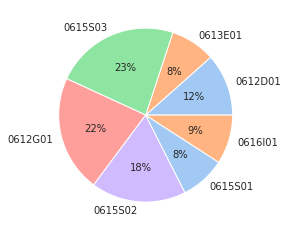

tag
0612D01     5687
0612G01     4114
0613E01    11401
0615S01    10659
0615S02     8680
0615S03     4127
0616I01     4487
Name: horas, dtype: int64

In [147]:
# d_tag = dc.groupby(['curso_id', 'rotulo', 'tag'])['horas'].sum()
d_tag = dc.groupby(['tag'])['horas'].sum()
# d_tag
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(d_tag, labels = cols, colors = colors, autopct='%.0f%%')
plt.show()
d_tag

### Gráficos de todos os cursos

In [148]:
d_tag = dc.groupby(['curso_id', 'tag'])['horas'].sum()
colors = sns.color_palette('pastel')[0:5]
df_tag = pd.DataFrame(d_tag)
df_tag.reset_index(inplace=True)
df_tag
# g = sns.FacetGrid(df_tag, col="curso_id", col_wrap=6, height=3) #, ylim=(0, 10))
# # # g.map(plt.pie, "tag", labels = cols) #, autopct='%.0f%%')
# g.map(sns.catplot,x='new_tag', y='horas', hue='new_tag', data=d_tag, kind='bar', height=3, aspect=1)


,curso_id,tag,horas
0,1517110,0612D01,260
1,1517110,0612G01,130
2,1517110,0613E01,390
3,1517110,0615S01,365
4,1517110,0615S02,585
...,...,...,...
141,1671887,0612G01,280
142,1671887,0613E01,120
143,1671887,0615S01,400
144,1671887,0615S02,250


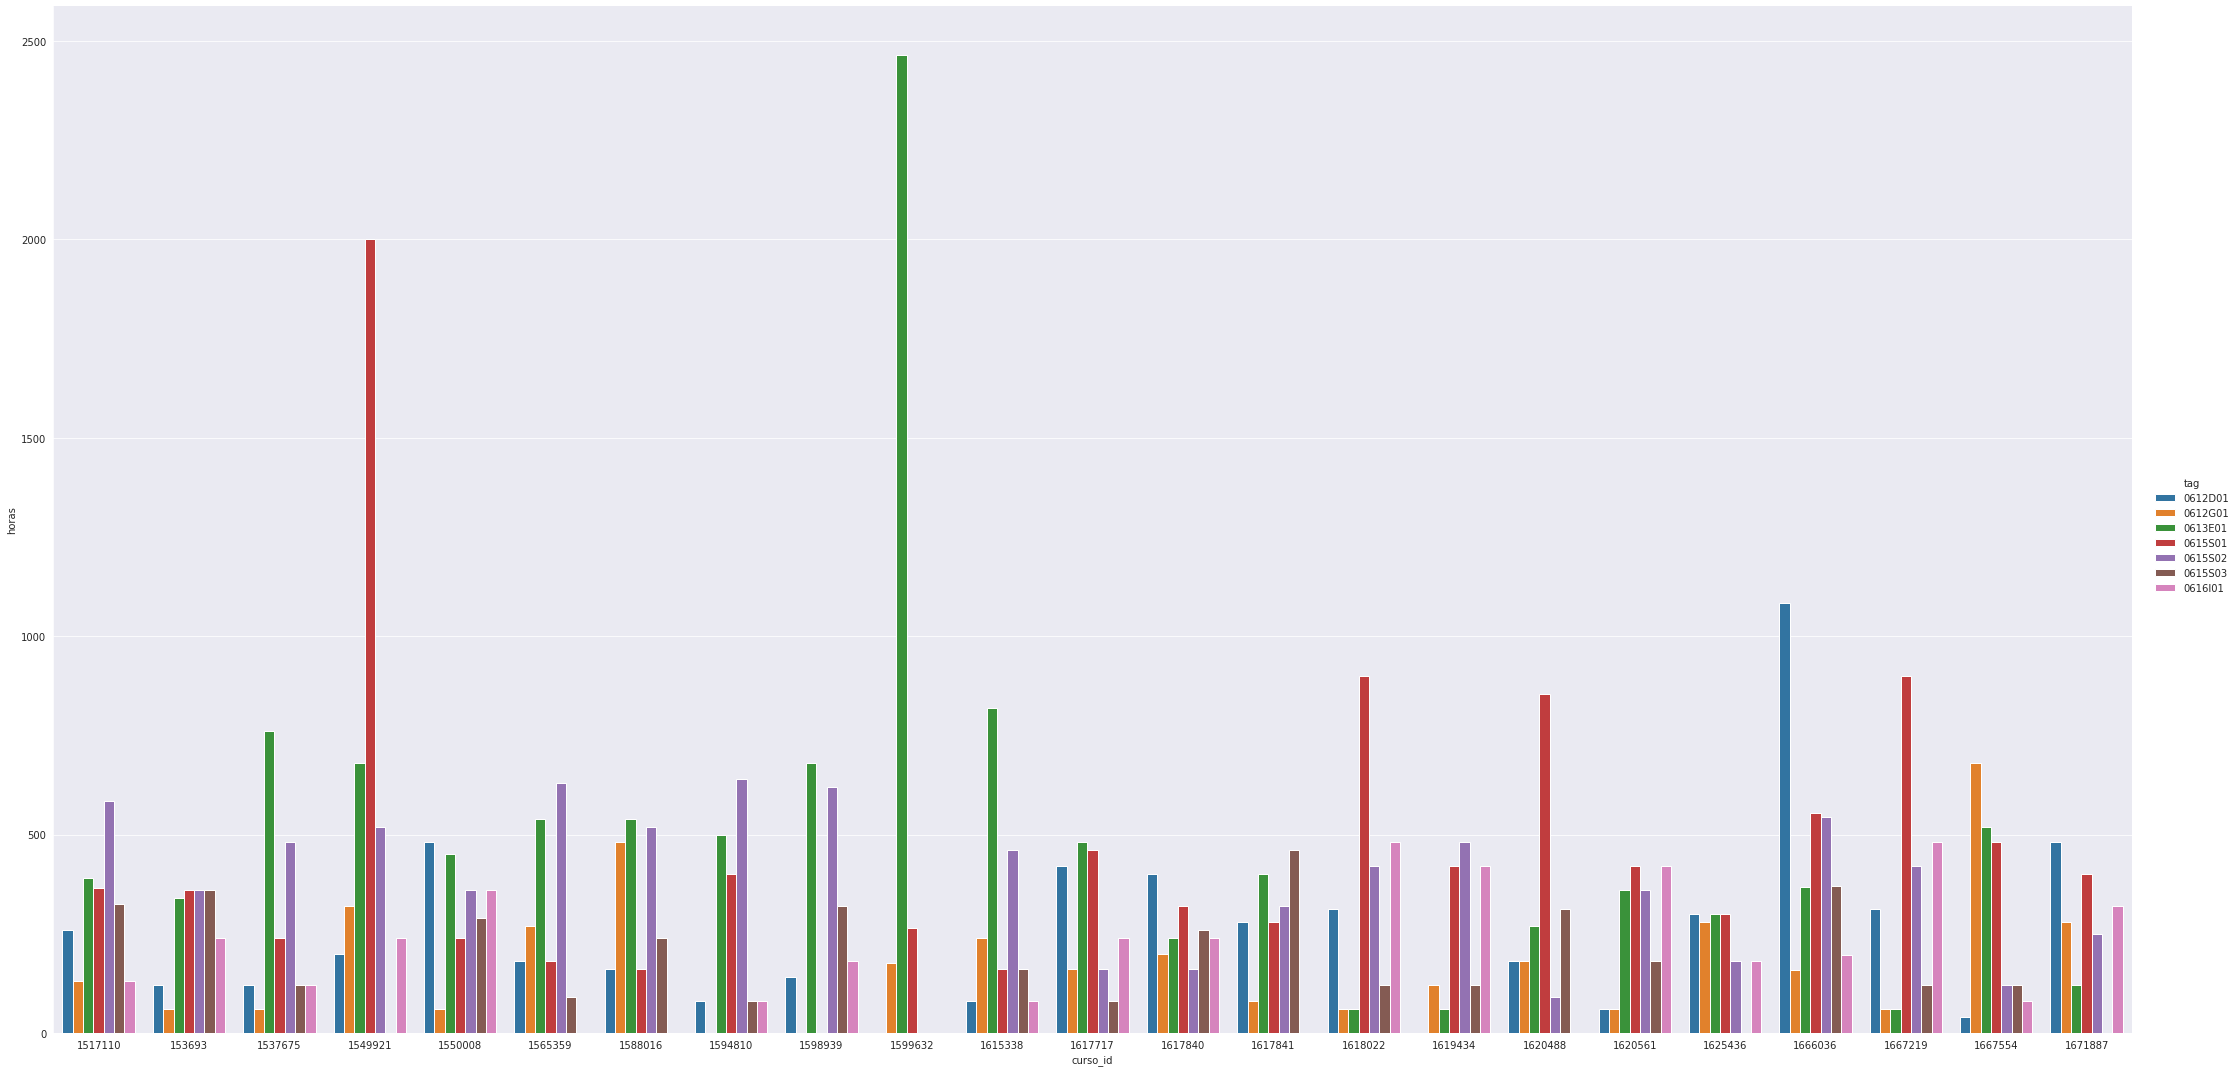

In [149]:
df_tag = dc.groupby(['curso_id', 'tag'])['horas'].sum()
df_tag = pd.DataFrame(df_tag)
df_tag.reset_index(inplace=True)
g = sns.catplot(x='curso_id', y='horas', hue='tag', data=df_tag, kind='bar', height=15, aspect=2)

# Recalcula Vetores dos rótulos

In [150]:
dv = dc.groupby(['tag'])['vector'].mean()
dcv = pd.DataFrame(dv, index=dc['tag'])
dv

tag
0612D01    [0.048356506013745686, 0.20332146578301427, -0...
0612G01    [0.2364472603030303, -0.04641895181818182, 0.1...
0613E01    [0.09108216583885216, 0.03404093515452539, 0.0...
0615S01    [0.0653546873958333, 0.1656534897767857, -0.02...
0615S02    [0.0456758595703125, 0.25628324811197956, 0.06...
0615S03    [0.1256822847192608, 0.030732761584932485, 0.0...
0616I01    [0.17571622023809524, 0.11798241666666665, -0....
Name: vector, dtype: object

In [151]:
for rotulo, vetor in dcv.itertuples(name=None):
    dc[rotulo] = df.apply(lambda row: euclid(row.vector, vetor), axis=1)
cols = ['0612D01', '0613E01', '0615S03', '0612G01', '0615S02', '0615S01', '0616I01']
def rotulo(rotular):
    return cols[rotular.index(min(rotular))]
# print("cols", cols)
dc["new_tag"] = dc.apply(lambda row: rotulo([row.get(c) for c in cols]), axis=1)
dcn = dc["curso_id,nomeado,nome_disciplina,rotulo,tag,new_tag,horas,euclidiana".split(",")].copy()
dcn

,curso_id,nomeado,nome_disciplina,rotulo,tag,new_tag,horas,euclidiana
0,1666036,defesa cibernética,Projeto Integrador - Elementos e Conceitos de ...,0612D01,0615S03,0613E01,70,0.712034
1,1666036,defesa cibernética,Sistemas Computacionais para CiberSegurança,0612D01,0616I01,0616I01,63,0.716514
2,1666036,defesa cibernética,Estudo do Espaço Cibernético,0612D01,0613E01,0613E01,63,1.064407
3,1666036,defesa cibernética,Lógica Matemática,0612D01,0615S01,0616I01,63,1.104604
4,1666036,defesa cibernética,Teologia e Fenômeno Humano,0612D01,0615S03,0615S03,32,1.186576
...,...,...,...,...,...,...,...,...
724,1549921,segurança da informação,Usabilidade e Fatores Humanos em Cibersegurança,0615S01,0615S01,0615S01,80,0.798916
725,1549921,segurança da informação,Governança de Cibersegurança,0615S01,0615S01,0615S01,80,0.926740
726,1549921,segurança da informação,Blockchain,0615S01,0613E01,0613E01,80,0.810069
727,1549921,segurança da informação,Empreendedorismo e Inovação em TI,0615S01,0616I01,0616I01,40,0.978004


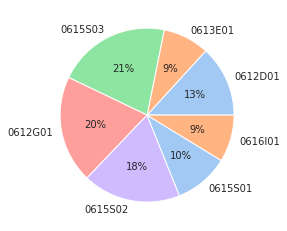

In [152]:
colors = sns.color_palette('pastel')[0:5]
d_tag = dcn.groupby(['new_tag'])['horas'].sum()

#create pie chart
plt.pie(d_tag, labels = cols, colors = colors, autopct='%.0f%%')
plt.show()

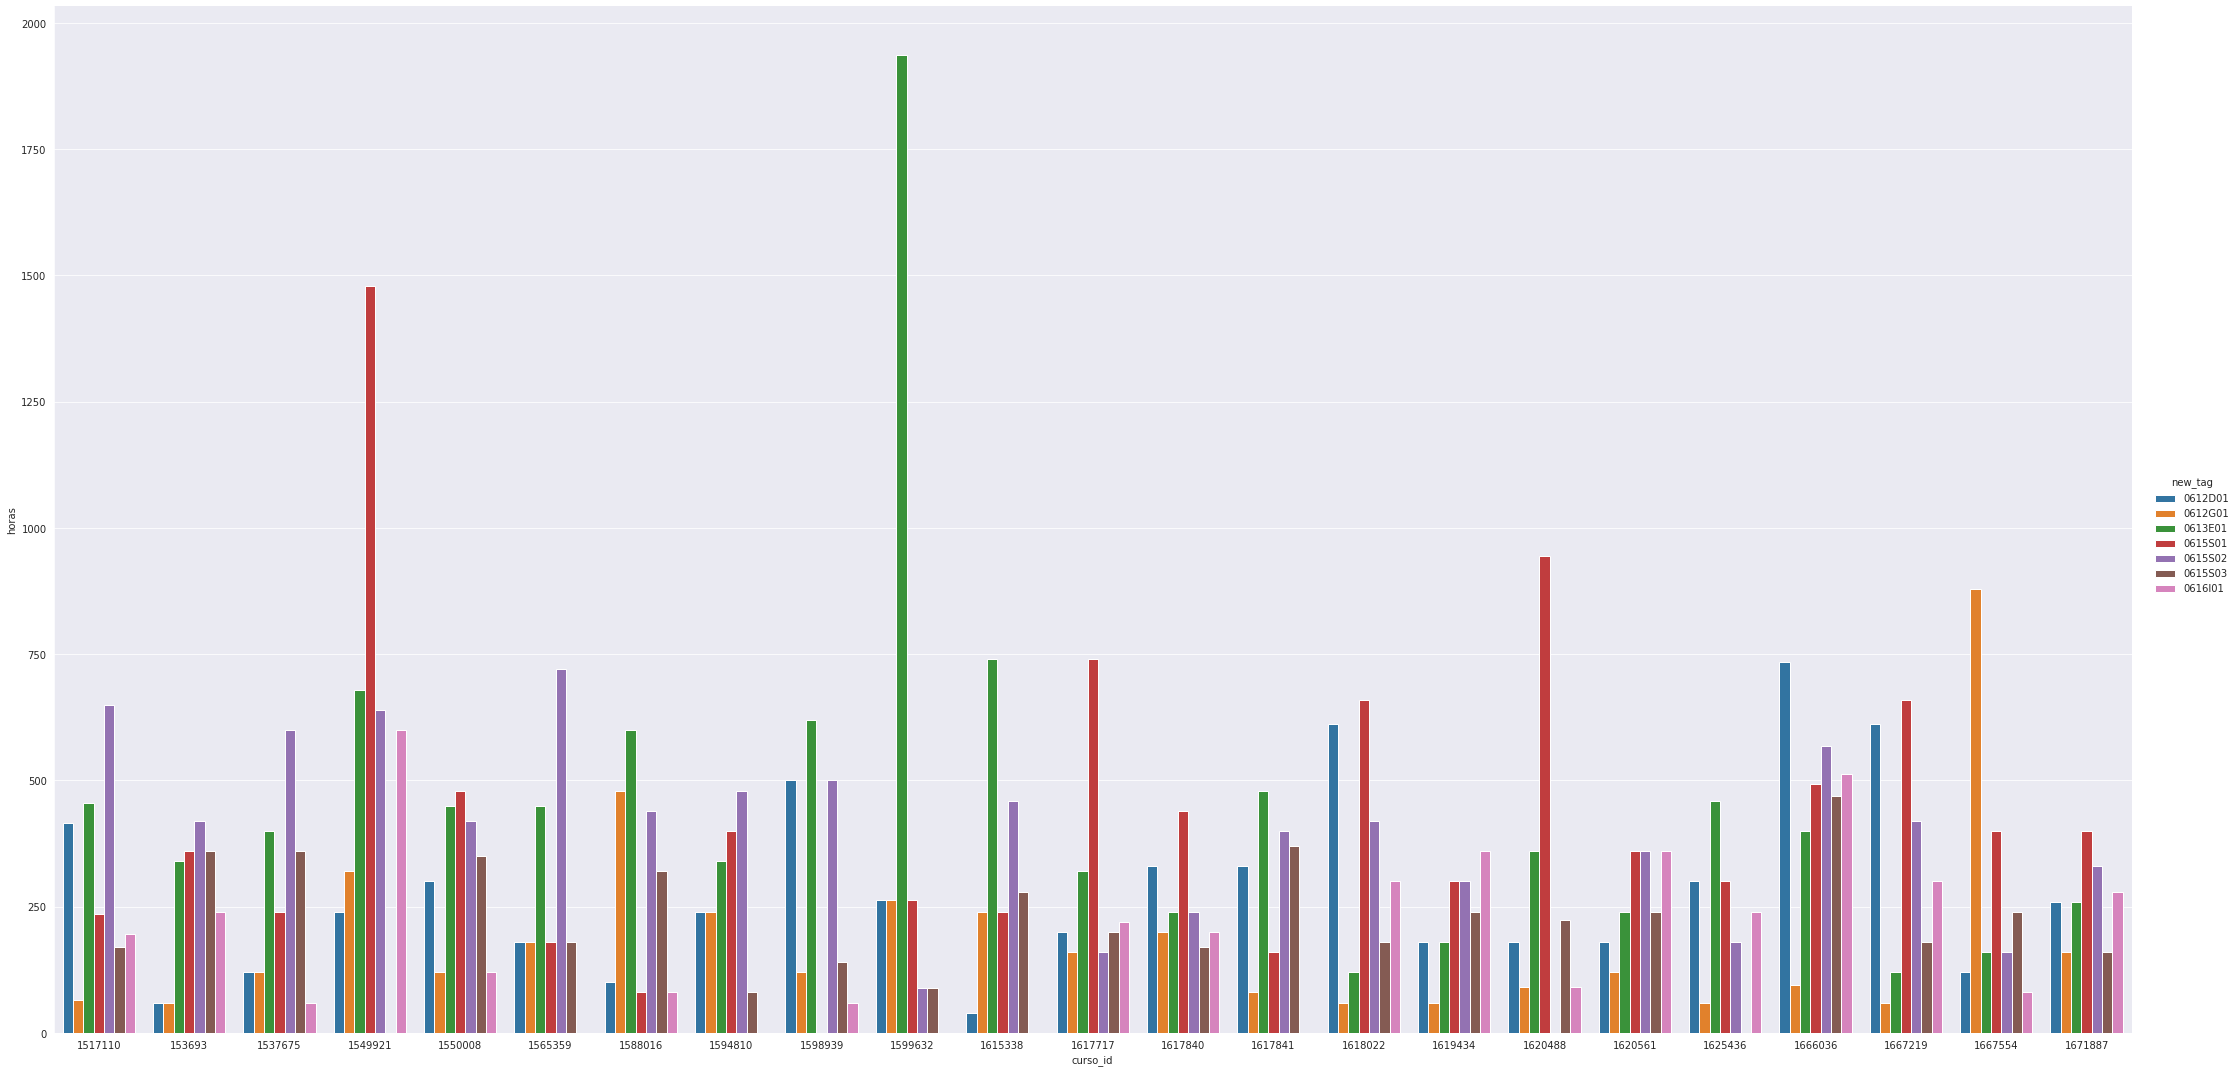

In [153]:
df_tag = dcn.groupby(['curso_id', 'new_tag'])['horas'].sum()
df_tag = pd.DataFrame(df_tag)
df_tag.reset_index(inplace=True)
g = sns.catplot(x='curso_id', y='horas', hue='new_tag', data=df_tag, kind='bar', height=15, aspect=2)


In [154]:
d_pred = dcn.groupby(["curso_id", 'new_tag'])['horas'].sum()
d_pred = pd.DataFrame(d_pred)
d_pred.reset_index(inplace=True)
d_tot = dcn.groupby(['curso_id'])['horas'].sum()
# dt_tot = d_total.to_dict()
d_pred["parte"] = d_pred.apply(lambda x: 100*x.horas/d_tot[x.curso_id], axis=1)
# d_pred
# dt_tot
d_pred

,curso_id,new_tag,horas,parte
0,1517110,0612D01,415,18.993135
1,1517110,0612G01,65,2.974828
2,1517110,0613E01,455,20.823799
3,1517110,0615S01,235,10.755149
4,1517110,0615S02,650,29.748284
...,...,...,...,...
147,1671887,0613E01,260,14.054054
148,1671887,0615S01,400,21.621622
149,1671887,0615S02,330,17.837838
150,1671887,0615S03,160,8.648649


In [155]:
# d_pred.pivot(index='curso_id', columns='new_tag', values='horas')
d_pred = d_pred.set_index(['curso_id','new_tag'])['parte'].unstack(fill_value=0)
d_pred

new_tag,0612D01,0612G01,0613E01,0615S01,0615S02,0615S03,0616I01
curso_id,,,,,,,
1517110,18.993135,2.974828,20.823799,10.755149,29.748284,7.780320,8.924485
153693,3.260870,3.260870,18.478261,19.565217,22.826087,19.565217,13.043478
1537675,6.315789,6.315789,21.052632,12.631579,31.578947,18.947368,3.157895
1549921,6.060606,8.080808,17.171717,37.373737,16.161616,0.000000,15.151515
1550008,13.392857,5.357143,20.089286,21.428571,18.750000,15.625000,5.357143
1565359,9.523810,9.523810,23.809524,9.523810,38.095238,9.523810,0.000000
1588016,4.761905,22.857143,28.571429,3.809524,20.952381,15.238095,3.809524
1594810,13.483146,13.483146,19.101124,22.471910,26.966292,4.494382,0.000000
1598939,25.773196,6.185567,31.958763,0.000000,25.773196,7.216495,3.092784


In [156]:
import csv

do = dcn["curso_id,nome_disciplina,rotulo,horas,new_tag,nomeado".split(",")].copy()
do["new_tag"] = do["new_tag"].astype(str)
sai = Path(here).parent.parent / "src" / "data" / 'relatorio.csv'
do.to_csv(sai, encoding='utf-8', index=False, quoting=csv.QUOTE_NONNUMERIC, quotechar='"')
do


,curso_id,nome_disciplina,rotulo,horas,new_tag,nomeado
0,1666036,Projeto Integrador - Elementos e Conceitos de ...,0612D01,70,0613E01,defesa cibernética
1,1666036,Sistemas Computacionais para CiberSegurança,0612D01,63,0616I01,defesa cibernética
2,1666036,Estudo do Espaço Cibernético,0612D01,63,0613E01,defesa cibernética
3,1666036,Lógica Matemática,0612D01,63,0616I01,defesa cibernética
4,1666036,Teologia e Fenômeno Humano,0612D01,32,0615S03,defesa cibernética
...,...,...,...,...,...,...
724,1549921,Usabilidade e Fatores Humanos em Cibersegurança,0615S01,80,0615S01,segurança da informação
725,1549921,Governança de Cibersegurança,0615S01,80,0615S01,segurança da informação
726,1549921,Blockchain,0615S01,80,0613E01,segurança da informação
727,1549921,Empreendedorismo e Inovação em TI,0615S01,40,0616I01,segurança da informação
